### Lab -- Data Prep

Welcome to today's lab!  Today we're going to shift our attention to a more demanding dataset -- the restaurants data.  A quarter million rows, dates, and categorical data make this a more interesting, realistic use case of boosting.  

The point of today's lab will be to experiment with different encoding methods and model parameters.

**Step 1:**  Load in your dataset, and declare `X` and `y`.

**Bonus:**  If you would like, encode some of the time based data we created in previous classes.  For now, just try and extract different date parts like month, day, year, etc.  If you do not do this, you should drop the date columns before declaring `X` and `y`.

In [1]:
# your code here
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.tree import DecisionTreeRegressor, plot_tree
df = pd.read_csv(r"C:\Users\Jonat\dat-master\Data\Unit2\restaurant_data\master.csv", parse_dates = ['visit_date'])

# will encode month and year
df['month'] = df['visit_date'].dt.month
df['year']  = df['visit_date'].dt.year

# fill in missing values with 0
df = df.fillna(0)

# DROP the date column
X = df.drop(['visit_date', 'visitors'], axis = 1)
y = df['visitors']

**Step 2:** Experiment with different encoding methods

Let's do a quick check to see how different encoding methods work out of the box on our dataset.

You're going to repeat the same process for each of `OrdinalEncoder`, `TargetEncoder`, and `OneHotEncoder` and see which one gives you the best results on our data.

**2a:** Use an `OrdinalEncoder` to transform your training set with the `fit_transform` method.

If you are confused about how the transformation is happening, try using the `mapping()` method on your category encoder to get a hang of what's going on.

In [2]:
X

,id,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors,month,year
0,air_ba937bf13d40fb24,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,2016
1,air_ba937bf13d40fb24,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,2016
2,air_ba937bf13d40fb24,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,2016
3,air_ba937bf13d40fb24,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,2016
4,air_ba937bf13d40fb24,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,2016
...,...,...,...,...,...,...,...,...,...,...
252103,air_a17f0778617c76e2,Friday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,6.0,4,2017
252104,air_a17f0778617c76e2,Saturday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,37.0,4,2017
252105,air_a17f0778617c76e2,Sunday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,35.0,3,2017
252106,air_a17f0778617c76e2,Monday,1,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3.0,3,2017


In [3]:
# your code here
ore = ce.OrdinalEncoder()
X1  = ore.fit_transform(X)

**2b:** Initialize a `DecisionTreeRegressor` with a `max_depth` set to 5, check the model score to see how it performed using the `score` method.

In [7]:
# your code here
tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X1, y)
tree.score(X1, y)

0.0910418888861726

**2c:** Repeat these same steps for the `TargetEncoder` and the `OneHotEncoder`

**Important:** The `OneHotEncoder` can take awhile to fit.  If nothing happens in around 4 minutes, just cancel the process and try it again later on when you have more time.

In [14]:
# your code here
ohe = ce.OneHotEncoder()
X2  = ohe.fit_transform(X)
tree.fit(X2, y)
tree.score(X2, y)

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.09044386344858102

In [8]:
# and for target encoding
te = ce.TargetEncoder()
X3  = te.fit_transform(X, y)
tree.fit(X3, y)
tree.score(X3, y)

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.4534961233081768

**Step 3:** Look at your most important features

Similar to the previous lab, take your model's most important features and load them into a dataframe to see what's driving your results.

In [17]:
# your code here
feats = pd.DataFrame({
    'Columns': X3.columns,
    'Importance': tree.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

feats

,Columns,Importance
0,id,0.901086
1,day_of_week,0.095215
2,holiday,0.002277
6,longitude,0.001422
3,genre,0.000000
4,area,0.000000
5,latitude,0.000000
7,reserve_visitors,0.000000
8,month,0.000000
9,year,0.000000


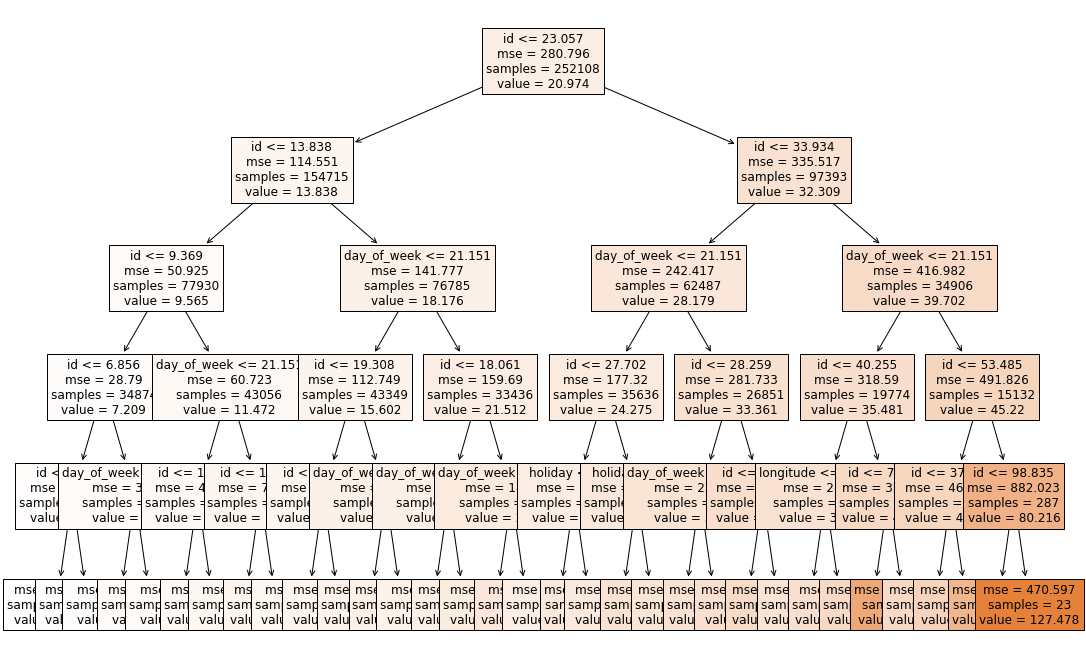

In [9]:
# if you want to visualize the tree
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 12))

plot_tree(tree, fontsize = 12, filled = True, feature_names = X3.columns);

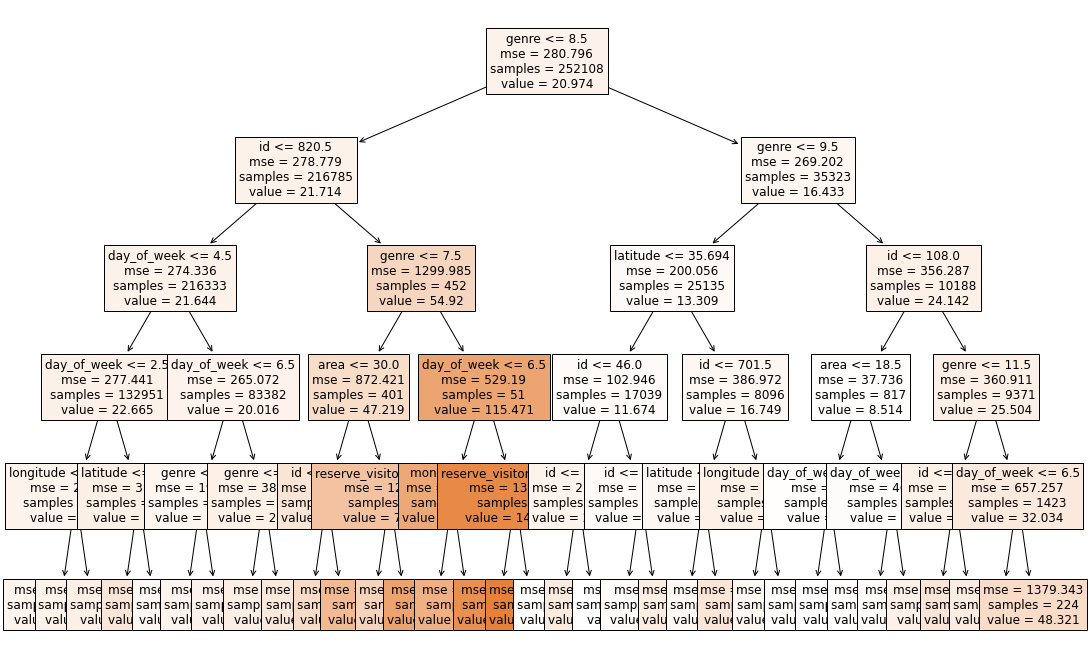

In [10]:
# for a comparison, here's the same tree for an Ordinal encoder
plt.figure(figsize = (18, 12))
tree.fit(X1, y)
plot_tree(tree, fontsize = 12, filled = True, feature_names = X3.columns);

**Step 4:** Using the pipeline that was discussed in class, try and do the following:
 
 - Create a pipeline for the encoder that worked best for the previous step, and a decision tree with the same parameters that were used previously

 - Create an in-sample and out-of-sample portion for your dataset.  The in sample portion will be all rows for each restaurant for the dataset, up until the last 15.  The out-of-sample portion of your data will be the last 15 days for each restaurant.  (This same task was completed in an earlier lab, so feel free to use that as a reference if you're not sure how to do this).
 
 - Fit your model on the training set, and then score it on the test set.  Note how the two different values differ.

In [11]:
# your code here
from sklearn.pipeline import make_pipeline

# sort by id and date, just to make sure
df.sort_values(by = ['id', 'visit_date'], inplace = True)

# create in-sample / out-of-sample splits
train = df.groupby('id').apply(lambda x: x.iloc[:-15])
test  = df.groupby('id').apply(lambda x: x.iloc[-15:])

In [12]:
train

id visit_date  visitors  \
id                                                                       
air_00a91d42b08b08d9 166836  air_00a91d42b08b08d9 2016-07-01        35   
                     166837  air_00a91d42b08b08d9 2016-07-02         9   
                     166838  air_00a91d42b08b08d9 2016-07-04        20   
                     166839  air_00a91d42b08b08d9 2016-07-05        25   
                     166840  air_00a91d42b08b08d9 2016-07-06        29   
...                                           ...        ...       ...   
air_fff68b929994bfbd 216629  air_fff68b929994bfbd 2017-04-03         2   
                     216630  air_fff68b929994bfbd 2017-04-04         4   
                     216631  air_fff68b929994bfbd 2017-04-05         6   
                     216632  air_fff68b929994bfbd 2017-04-06         6   
                     216633  air_fff68b929994bfbd 2017-04-07         9   

                            day_of_week  holiday           genre  \
id                                                                 
air_00a91d42b08b08d9 166836      Friday        0  Italian/French   
                     166837    Saturday        0  Italian/French   
                     166838      Monday        0  Italian/French   
                     166839     Tuesday        0  Italian/French   
                     166840   Wednesday        0  Italian/French   
...                                 ...      ...             ...   
air_fff68b929994bfbd 216629      Monday        0    Bar/Cocktail   
                     216630     Tuesday        0    Bar/Cocktail   
                     216631   Wednesday        0    Bar/Cocktail   
                     216632    Thursday        0    Bar/Cocktail   
                     216633      Friday        0    Bar/Cocktail   

                                                        area   latitude  \
id                                                                        
air_00a91d42b08b08d9 166836  Tōkyō-to Chiyoda-ku Kudanminami  35.694003   
                     166837  Tōkyō-to Chiyoda-ku Kudanminami  35.694003   
                     166838  Tōkyō-to Chiyoda-ku Kudanminami  35.694003   
                     166839  Tōkyō-to Chiyoda-ku Kudanminami  35.694003   
                     166840  Tōkyō-to Chiyoda-ku Kudanminami  35.694003   
...                                                      ...        ...   
air_fff68b929994bfbd 216629        Tōkyō-to Nakano-ku Nakano  35.708146   
                     216630        Tōkyō-to Nakano-ku Nakano  35.708146   
                     216631        Tōkyō-to Nakano-ku Nakano  35.708146   
                     216632        Tōkyō-to Nakano-ku Nakano  35.708146   
                     216633        Tōkyō-to Nakano-ku Nakano  35.708146   

                              longitude  reserve_visitors  month  year  
id                                                                      
air_00a91d42b08b08d9 166836  139.753595               0.0      7  2016  
                     166837  139.753595               4.0      7  2016  
                     166838  139.753595               0.0      7  2016  
                     166839  139.753595               0.0      7  2016  
                     166840  139.753595               0.0      7  2016  
...                                 ...               ...    ...   ...  
air_fff68b929994bfbd 216629  139.666288               0.0      4  2017  
                     216630  139.666288               0.0      4  2017  
                     216631  139.666288               2.0      4  2017  
                     216632  139.666288               8.0      4  2017  
                     216633  139.666288               1.0      4  2017  

[239673 rows x 12 columns]

In [13]:
test

id visit_date  visitors  \
id                                                                       
air_00a91d42b08b08d9 167048  air_00a91d42b08b08d9 2017-04-05        35   
                     167049  air_00a91d42b08b08d9 2017-04-06        29   
                     167050  air_00a91d42b08b08d9 2017-04-07        17   
                     167051  air_00a91d42b08b08d9 2017-04-08         9   
                     167052  air_00a91d42b08b08d9 2017-04-10        17   
...                                           ...        ...       ...   
air_fff68b929994bfbd 216643  air_fff68b929994bfbd 2017-04-18         6   
                     216644  air_fff68b929994bfbd 2017-04-19         2   
                     216645  air_fff68b929994bfbd 2017-04-20         2   
                     216646  air_fff68b929994bfbd 2017-04-21         4   
                     216647  air_fff68b929994bfbd 2017-04-22         5   

                            day_of_week  holiday           genre  \
id                                                                 
air_00a91d42b08b08d9 167048   Wednesday        0  Italian/French   
                     167049    Thursday        0  Italian/French   
                     167050      Friday        0  Italian/French   
                     167051    Saturday        0  Italian/French   
                     167052      Monday        0  Italian/French   
...                                 ...      ...             ...   
air_fff68b929994bfbd 216643     Tuesday        0    Bar/Cocktail   
                     216644   Wednesday        0    Bar/Cocktail   
                     216645    Thursday        0    Bar/Cocktail   
                     216646      Friday        0    Bar/Cocktail   
                     216647    Saturday        0    Bar/Cocktail   

                                                        area   latitude  \
id                                                                        
air_00a91d42b08b08d9 167048  Tōkyō-to Chiyoda-ku Kudanminami  35.694003   
                     167049  Tōkyō-to Chiyoda-ku Kudanminami  35.694003   
                     167050  Tōkyō-to Chiyoda-ku Kudanminami  35.694003   
                     167051  Tōkyō-to Chiyoda-ku Kudanminami  35.694003   
                     167052  Tōkyō-to Chiyoda-ku Kudanminami  35.694003   
...                                                      ...        ...   
air_fff68b929994bfbd 216643        Tōkyō-to Nakano-ku Nakano  35.708146   
                     216644        Tōkyō-to Nakano-ku Nakano  35.708146   
                     216645        Tōkyō-to Nakano-ku Nakano  35.708146   
                     216646        Tōkyō-to Nakano-ku Nakano  35.708146   
                     216647        Tōkyō-to Nakano-ku Nakano  35.708146   

                              longitude  reserve_visitors  month  year  
id                                                                      
air_00a91d42b08b08d9 167048  139.753595               2.0      4  2017  
                     167049  139.753595               8.0      4  2017  
                     167050  139.753595               1.0      4  2017  
                     167051  139.753595              33.0      4  2017  
                     167052  139.753595               0.0      4  2017  
...                                 ...               ...    ...   ...  
air_fff68b929994bfbd 216643  139.666288               0.0      4  2017  
                     216644  139.666288               0.0      4  2017  
                     216645  139.666288               1.0      4  2017  
                     216646  139.666288               6.0      4  2017  
                     216647  139.666288              37.0      4  2017  

[12435 rows x 12 columns]

In [28]:
# split into X & y
X_train = train.drop(['visit_date', 'visitors'], axis = 1)
y_train = train['visitors']

# and for the test set
X_test = test.drop(['visit_date', 'visitors'], axis = 1)
y_test = test['visitors']

# make our pipeline
pipe = make_pipeline(te, tree)

# fit on the in-sample data
pipe.fit(X_train, y_train)

# score on the out of sample data
pipe.score(X_test, y_test)

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.453061252667987